# Predicting Sales Price of Bulldozers



**Description:**
The goal of this project is to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuaration. The data is sourced from auction result postings and includes information on usage and equipment configurations.

**The key fields are in train.csv are:**
* SalesID: the uniue identifier of the sale.
* MachineID: the unique identifier of a machine. A machine can be sold multiple times.
* saleprice: what the machine sold for at auction (only in train.csv).
* saledate: the date of the sale.

**The data is split into three parts:**
* **Train.csv** is the training set, which contains data through the end of 2011.
* **Valid.csv** is the validation set, which contains data from January 1, 2012 - April 30, 2012. Make predictions on this set.
* **Test.csv**  contains data from May 1, 2012 - November 2012.

*Dataset: https://www.kaggle.com/c/bluebook-for-bulldozers/data*

In [1]:
# Importing necessary libraries needed for the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Import training and validation dataset

train_valid_data = pd.read_csv("data/bulldozers/TrainAndValid.csv", low_memory=False)

In [3]:
# vieing data
train_valid_data.head(10)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1139255,26500.0,1001274,4605,121,3.0,2004,508.0,Low,12/18/2008 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1139256,21000.0,772701,1937,121,3.0,1993,11540.0,High,8/26/2004 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
7,1139261,27000.0,902002,3539,121,3.0,2001,4883.0,High,11/17/2005 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1139272,21500.0,1036251,36003,121,3.0,2008,302.0,Low,8/27/2009 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
9,1139275,65000.0,1016474,3883,121,3.0,1000,20700.0,Medium,8/9/2007 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [4]:
# check if any null values

train_valid_data.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

<AxesSubplot:>

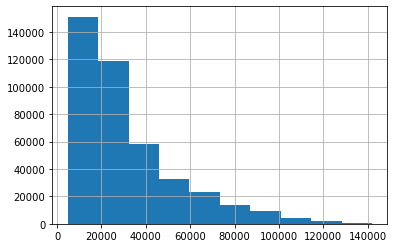

In [5]:
# distribution of sales

train_valid_data.SalePrice.hist()

In [6]:
# importing our data with parsed dates

train_valid_data = pd.read_csv("data/bulldozers/TrainAndValid.csv",
                               low_memory=False,
                               parse_dates=["saledate"])

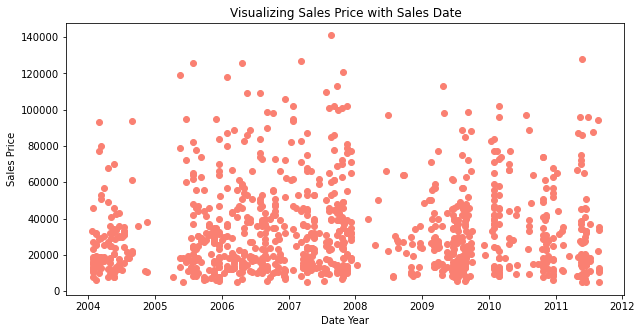

In [7]:
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(train_valid_data.saledate[:1000], train_valid_data.SalePrice[:1000], color=["salmon"])

plt.title("Visualizing Sales Price with Sales Date")
plt.xlabel("Date Year")
plt.ylabel("Sales Price");

In [8]:
# sort data by sales date

train_valid_data.sort_values(by=["saledate"], ascending=True, inplace=True)
train_valid_data.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [9]:
# makiing a copy of our data

data_temp = train_valid_data.copy()

In [10]:
# creting seperate column for date attributes
# pandas date time attributes docs: https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DatetimeIndex.html

data_temp["saleDay"] = data_temp.saledate.dt.day
data_temp["saleMonth"] = data_temp.saledate.dt.month
data_temp["saleYear"] = data_temp.saledate.dt.year
data_temp["dayOfWeek"] = data_temp.saledate.dt.dayofweek
data_temp["dayOfYear"] = data_temp.saledate.dt.dayofyear
data_temp["isYearStart"] = data_temp.saledate.dt.is_year_start
data_temp["isYearEnd"] = data_temp.saledate.dt.is_year_end

In [11]:
data_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Travel_Controls,Differential_Type,Steering_Controls,saleDay,saleMonth,saleYear,dayOfWeek,dayOfYear,isYearStart,isYearEnd
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,NaN,NaN,17,1,1989,1,17,False,False
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,Standard,Conventional,31,1,1989,1,31,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,None or Unspecified,NaN,NaN,31,1,1989,1,31,False,False
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,Standard,Conventional,31,1,1989,1,31,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,Lever,NaN,NaN,31,1,1989,1,31,False,False


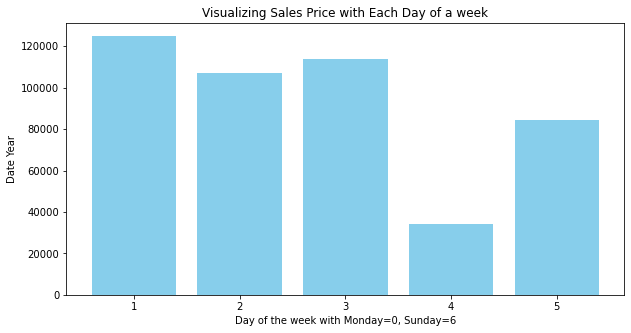

In [12]:
# Visualizing Sales Price with Each Day of a week

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data_temp.dayOfWeek[:1000], data_temp.SalePrice[:1000], color=["skyblue"])

plt.title("Visualizing Sales Price with Each Day of a week")
plt.ylabel("Date Year")
plt.xlabel("Day of the week with Monday=0, Sunday=6");

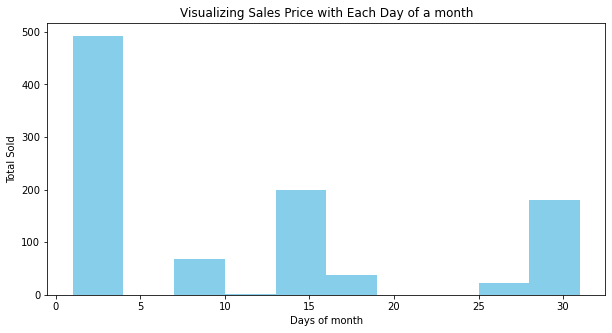

In [13]:
# Visualizing Sales Price with Each Day of a month

fig, ax = plt.subplots(figsize=(10,5))
ax.hist(data_temp.saleDay[:1000], color=["skyblue"])

plt.title("Visualizing Sales Price with Each Day of a month")
plt.ylabel("Total Sold")
plt.xlabel("Days of month");

In [14]:
data_temp.drop(["saledate"], axis=1, inplace=True)

In [15]:
# convert all strings to categories

for label, content in data_temp.items():
    if pd.api.types.is_string_dtype(content):
        data_temp[label] = content.astype("category").cat.as_ordered()

In [16]:
# about our data
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 59 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [17]:
# check if our data contains missing values
data_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [18]:
# Filling numeric columns with media of that column
for label, content in data_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            data_temp[label + "_is_missing"] = pd.isnull(content)
            data_temp[label] = content.fillna(content.median())

In [19]:
data_temp.isna().sum()

SalesID                                0
SalePrice                              0
MachineID                              0
ModelID                                0
datasource                             0
                                      ..
dayOfYear                              0
isYearStart                            0
isYearEnd                              0
auctioneerID_is_missing                0
MachineHoursCurrentMeter_is_missing    0
Length: 61, dtype: int64

In [20]:
# filling missing of categorical data

for label, content in data_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        data_temp[label + "_is_missing"] = pd.isnull(content)
        data_temp[label] = pd.Categorical(content).codes+1

In [21]:
print(data_temp.isna().sum())

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 105, dtype: int64


# Splitting data into training and validation set

In [22]:
data_temp_valid = data_temp[data_temp.saleYear == 2012]
data_temp_train = data_temp[data_temp.saleYear != 2012]

x_train, y_train = data_temp_train.drop("SalePrice", axis=1), data_temp_train["SalePrice"]
x_valid, y_valid = data_temp_valid.drop("SalePrice", axis=1), data_temp_valid["SalePrice"]

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((401125, 104), (401125,), (11573, 104), (11573,))

In [23]:
# Creating a evaluation function
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score

def rmsle (y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(x_train)
    valid_preds = model.predict(x_valid)
    scores = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Validation MAE": mean_absolute_error(y_valid, valid_preds),
        "Training RMSLE": rmsle(y_train, train_preds),
        "Validation RMSLE": rmsle(y_valid, valid_preds),
        "Training R^2": r2_score(y_train, train_preds),
        "Validation R^2": r2_score(y_valid, valid_preds),
    }
    return scores

# Modelling

In [24]:
%%time
# # we'll be using regression because we are predicting a continous value

from sklearn.ensemble import RandomForestRegressor

# testing model on 10,000 samples to minimize the training time
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)

model.fit(x_train, y_train)

Wall time: 11.2 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [25]:
# to show scores

show_scores(model)

{'Training MAE': 5564.221162006855,
 'Validation MAE': 7156.058141363519,
 'Training RMSLE': 0.2578113170731898,
 'Validation RMSLE': 0.29277485156881927,
 'Training R^2': 0.8605512977099562,
 'Validation R^2': 0.8327588745823602}

In [26]:
%%time
# hyperparameter tunning
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42), 
                              verbose=True, cv=5, 
                              n_iter=100,
                              param_distributions= rf_grid)

rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Wall time: 4h 16min 29s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [27]:
show_scores(rs_model)

{'Training MAE': 3943.018977485561,
 'Validation MAE': 6026.277110509768,
 'Training RMSLE': 0.18875773462941273,
 'Validation RMSLE': 0.24597881747778313,
 'Training R^2': 0.9259892470059335,
 'Validation R^2': 0.8756467608668125}

# Making prediction on Test Data

In [31]:
# import test data

test_df = pd.read_csv("data/bulldozers/Test.csv",
                        low_memory=False,
                        parse_dates=["saledate"])
test_df.shape, x_train.shape

((12457, 52), (401125, 104))

In [32]:
# preprocess test data

def preprocess_data(df):
    # Add datetime parameters for saledate
    df["saleDay"] = df.saledate.dt.day
    df["saleMonth"] = df.saledate.dt.month
    df["saleYear"] = df.saledate.dt.year
    df["dayOfWeek"] = df.saledate.dt.dayofweek
    df["dayOfYear"] = df.saledate.dt.dayofyear
    df["isYearStart"] = df.saledate.dt.is_year_start
    df["isYearEnd"] = df.saledate.dt.is_year_end

    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

In [33]:
transformed_test = preprocess_data(test_df)
transformed_test.shape, x_train.shape

((12457, 103), (401125, 104))

In [34]:
transformed_test["auctioneerID_is_missing"] = False
transformed_test.shape, x_train.shape

((12457, 104), (401125, 104))

In [36]:
test_preds = rs_model.predict(transformed_test)


C:\Users\ASHISH\Desktop\ml_ds\ML_PROJECTS\project_predict-price-of-bulldozers\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [37]:
# our prediction on the test data
test_preds

array([19866.75098466, 20005.68570542, 52809.20364626, ...,
       14388.67007471, 17732.14032969, 25003.06913811])

# Conclusion:

**Model Accuracy:** 87.56%,
**Mean Absolute Error:** 6026.27,
**Root Mean Squared Log Error:** 0.2459